#  A/B Test For Ad campaign





<br>

### AB testing is essentially an experiment where two or more variants are evaluated by  statistical analysis to determine which variation performs better for a given conversion goal
<br>

### You are hired by a digital marketing agency that designed a new ad for their client and This ad is hosted on a website .They hired you to do an A/B test to advise them on whether they should go for the new ad or not .

## Load Dataset

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
#load the dataset
df = pd.read_excel('/content/AB Test.xlsx')
df.head(10)

,group,action
0,experiment,view
1,control,view
2,control,view and click
3,control,view and click
4,control,view
5,control,view
6,control,view
7,control,view
8,control,view
9,control,view and click


In [3]:
#show dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   3757 non-null   object
 1   action  3757 non-null   object
dtypes: object(2)
memory usage: 58.8+ KB


# Set Up Hypothesis Test


In [4]:
#find insights in our data
df['group'].value_counts()

experiment    1881
control       1876
Name: group, dtype: int64

In [5]:
#find insights in our data
df['action'].value_counts()

view              3082
view and click     675
Name: action, dtype: int64

**Experiment group**: the group that is involved in the new experiment . i.e the group that received the new ad.

**Control group**: the 2nd group that didn't receive the new ad.

**Click-through rate (CTR)**: the number of clicks advertisers receive on their ads per number of impressions.


## Hypothesis Testing steps:

1) Specify the Null hypothesis (what we assume to be true before we collect the data) i.e. the old ad is better than the new one

2) Specify the alternative hypothesis (what we want to try and prove to be true) 

3) Set the significance level (a): probability of rejecting the Null hypothesis when it is true
* significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
* significance level of 0.05 means we are 95% confident that we can reject the Null hypothesis.
* lower significance levels indicate that you require stronger evidence before you reject the Null hypothesis.

4) Calculate the corresponding p-value

5) Drawing a conclusion


**H0** = the CTR associated with the new ad is less than that associated with the old ad (old ad is better than new one)

**H1** = opposite of H0: the new ad is better than the old one or CTR of the new one is higher than CTR of the old one.

## Compute the difference in the click-through rate 

In [6]:
#get dataframe with all observations from control group 
control_df = df.query("group == 'control'")

#compute CTR for control group 
control_ctr = control_df.query("action == 'view and click'").index.nunique() / control_df.index.nunique()

#display the CTR For the control group
control_ctr

0.19349680170575692

In [7]:
#get dataframe with all records from experiment group 
experiment_df = df.query("group == 'experiment'")

#compute click through rate for experiment group 
experiment_ctr = experiment_df.query("action == 'view and click'").index.nunique() / experiment_df.index.nunique()

#display the CTR For the experiment group
experiment_ctr

0.16586921850079744

In [8]:
#compute the difference in the CTR 
diff = experiment_ctr - control_ctr

#display the difference 
diff

-0.027627583204959477

# Create sample distribution using bootsrapping

## Bootstrapping : 
The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples.

Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once. This approach to sampling is called sampling with replacement.

## Example : 
Bootstrapping in statistics, means sampling with replacement.
so if we have a group of individuals and , and want to bootsrap sample of ten individuals from this group , we could randomly sample any ten individuals but with bootsrapping, we are sampling with replacement so we could actually end up sampling 7 out of the ten individuals and three of the previously selected individuals might end up being sampled again

In [16]:
#bootsrapping
differences = []
size = df.shape[0]
for i in range(10000):
  sample = df.sample(size, replace=True)

  #get dataframe with all observations from control group 
  control_df = sample.query("group == 'control'")
  #compute CTR for control group 
  control_ctr = control_df.query("action == 'view and click'").index.nunique() / control_df.index.nunique()

  #get dataframe with all records from experiment group 
  experiment_df = sample.query("group == 'experiment'")
  #compute click through rate for experiment group 
  experiment_ctr = experiment_df.query("action == 'view and click'").index.nunique() / experiment_df.index.nunique()  

  differences.append(experiment_ctr - control_ctr)

In [17]:
differences[:20]

[-0.03360949547100023,
 -0.024655828839883043,
 -0.028523489932885893,
 -0.035680599347831965,
 -0.038407543186494864,
 -0.030496131414808142,
 -0.01922254635268833,
 -0.03288782005311067,
 -0.0314192249224268,
 -0.03299466549421606,
 -0.037865146058423366,
 -0.024293265117329488,
 -0.03870923783824451,
 -0.023382681779628323,
 -0.019105879127469638,
 -0.026033023216830098,
 -0.029417970662210302,
 -0.030843783276005343,
 -0.028544378631033734,
 -0.05059629836972196]

# Evaluate the null hypothesis and draw conclustions.

### The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed.

(array([5.000e+00, 1.150e+02, 6.370e+02, 2.009e+03, 3.034e+03, 2.736e+03,
        1.139e+03, 2.900e+02, 3.300e+01, 2.000e+00]),
 array([-0.06442298, -0.0566406 , -0.04885823, -0.04107586, -0.03329349,
        -0.02551111, -0.01772874, -0.00994637, -0.00216399,  0.00561838,
         0.01340075]),
 <a list of 10 Patch objects>)

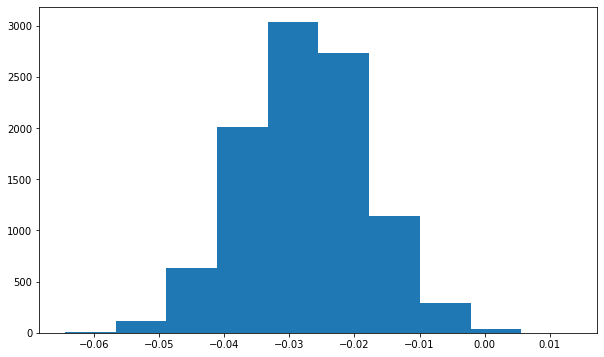

In [19]:
#plot the sampling distribution 
differences = np.array(differences)

#plot
plt.figure(figsize=(10, 6))
plt.hist(differences)

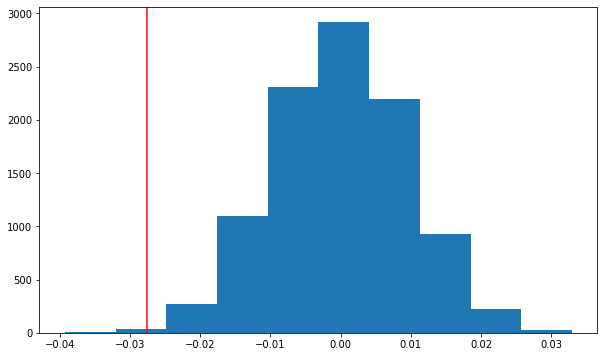

In [20]:
#simulate the distribution under the null hypothesis 
null_hypothesis = np.random.normal(0, differences.std(), differences.size)

#plot the null distribution 
plt.figure(figsize=(10, 6))
plt.hist(null_hypothesis)
plt.axvline(diff, c='red')

###  The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

### The confidence level is equivalent to 1 – the alpha level. So, if your significance level is 0.05, the corresponding confidence level is 95%.

###  i.e for P Value less than 0.05 we are 95% percent confident that we can reject the null hypothesis 

In [21]:
#compute the  p-value 
(null_hypothesis > diff).mean()

0.9987

We need p-value < 0.05 to reject H0, which is not the case this time.
Hence, the agency should not go for the new ad.